In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("Hospital Data.csv")
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.describe())
print(df.shape)
print(df['PatientId'].nunique())

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589980e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262960e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679510e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841190e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [5]:
df = df[df['Age'] >= 0]
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})
df.reset_index(drop=True, inplace=True)
print(df.info())
print(df.head())
print(df['No-show'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110526 entries, 0 to 110525
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. No-show distribution

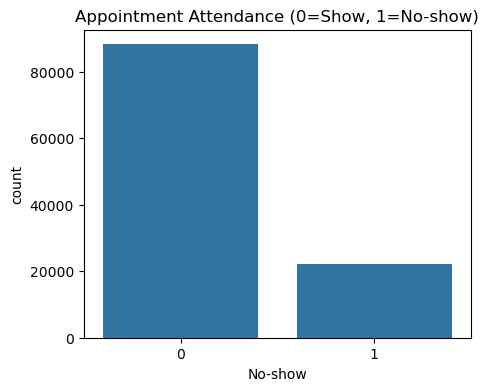

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='No-show')
plt.title("Appointment Attendance (0=Show, 1=No-show)")
plt.show()

In [ ]:
# Gender Vs No Show

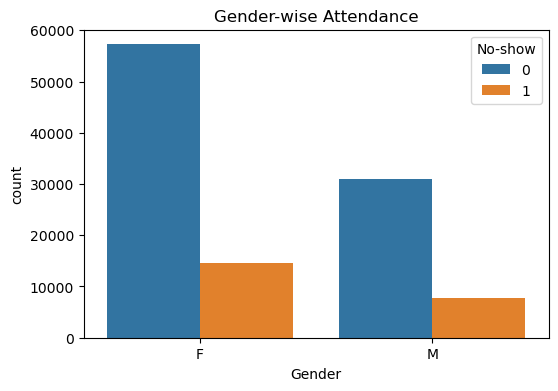

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='No-show')
plt.title("Gender-wise Attendance")
plt.show()

In [ ]:
# Age Vs No Show

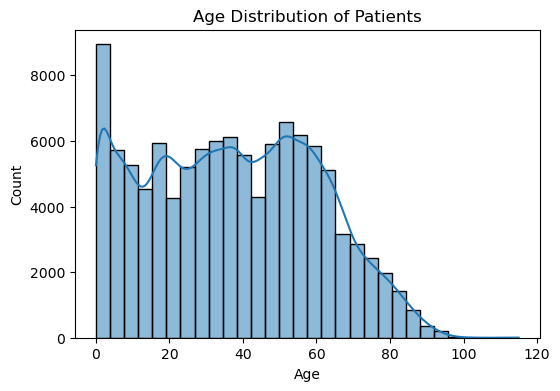

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Patients")
plt.show()

In [ ]:
# Waiting Day Vs No Show

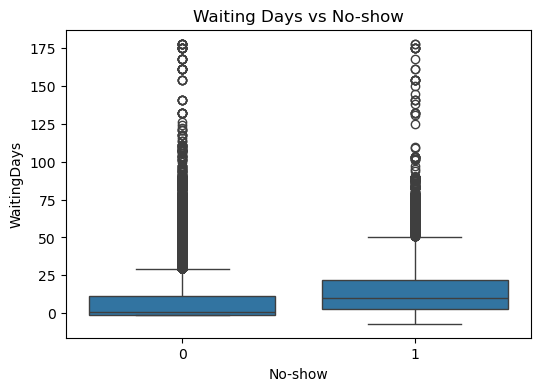

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='No-show', y='WaitingDays')
plt.title("Waiting Days vs No-show")
plt.show()

In [17]:
no_show_rate = df['No-show'].mean()*100
print(f"No-show Rate: {no_show_rate:.2f}%")

No-show Rate: 20.19%


In [23]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,35,60,100],
                        labels=['Child','Teen','Adult','MiddleAge','Senior'])

In [ ]:
# Age Group Vs No show

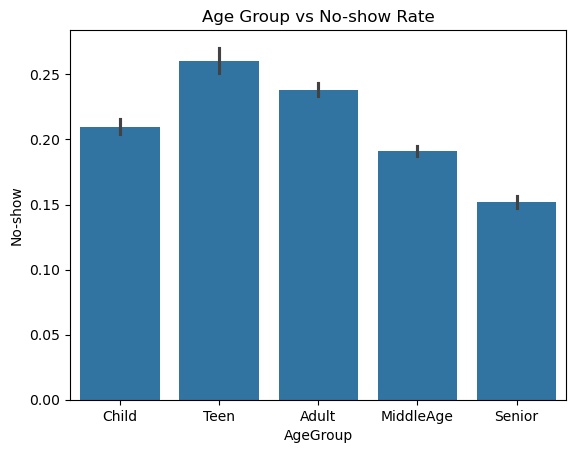

In [25]:
sns.barplot(data=df, x='AgeGroup', y='No-show')
plt.title("Age Group vs No-show Rate")
plt.show()

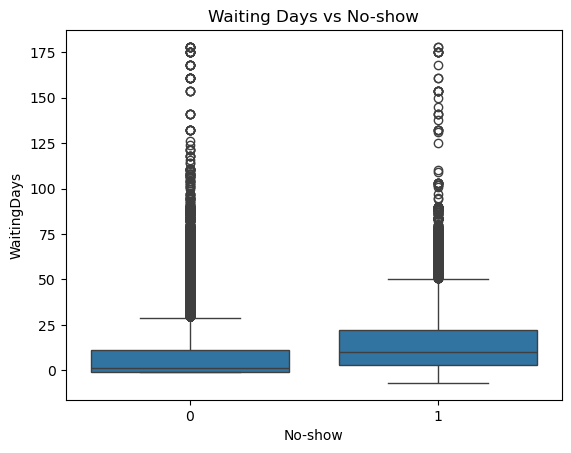

In [27]:
sns.boxplot(data=df, x='No-show', y='WaitingDays')
plt.title("Waiting Days vs No-show")
plt.show()

In [ ]:
# SMS Reminder Effectiveness

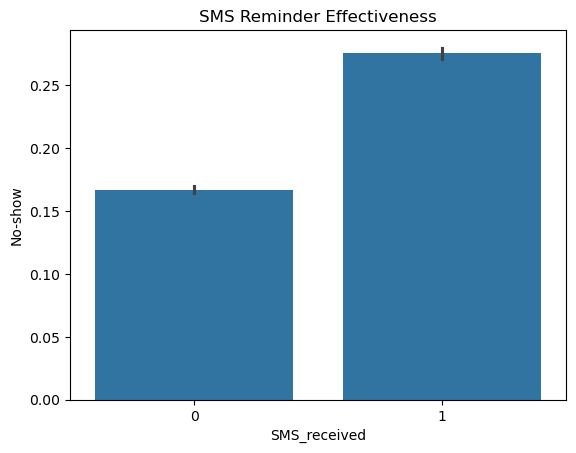

In [29]:
sns.barplot(data=df, x='SMS_received', y='No-show')
plt.title("SMS Reminder Effectiveness")
plt.show()

In [ ]:
# Effect of Hypertention, Diabetes, Alcoholism, And Handicap

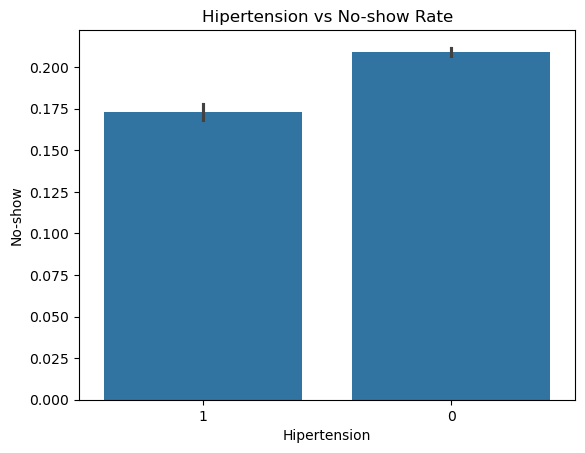

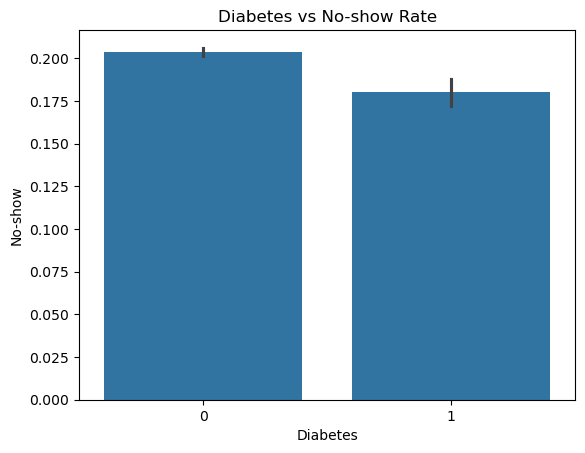

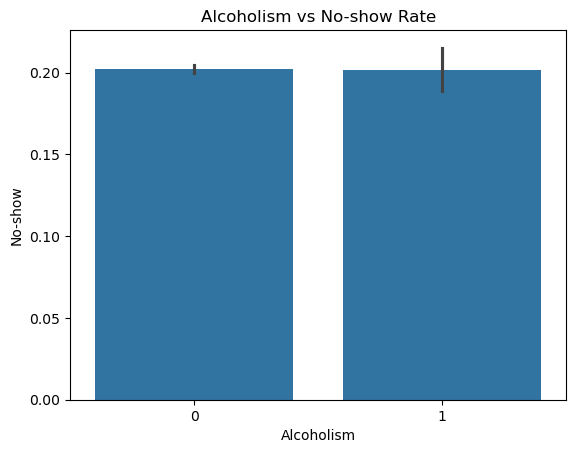

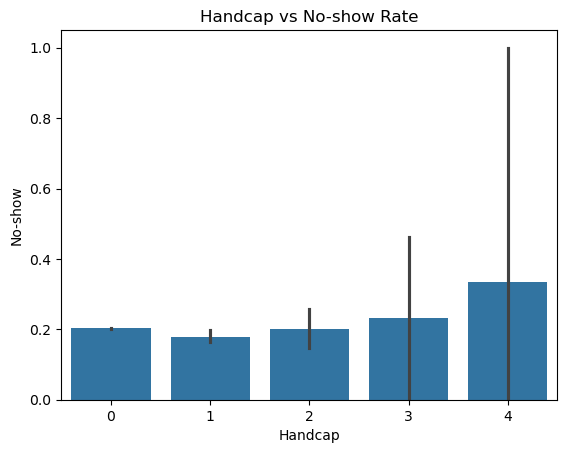

In [31]:
cols = ['Hipertension','Diabetes','Alcoholism','Handcap']
for c in cols:
    sns.barplot(data=df, x=df[c].astype(str), y='No-show')
    plt.title(f"{c} vs No-show Rate")
    plt.show()

In [ ]:
#Neighbourhood Analysis

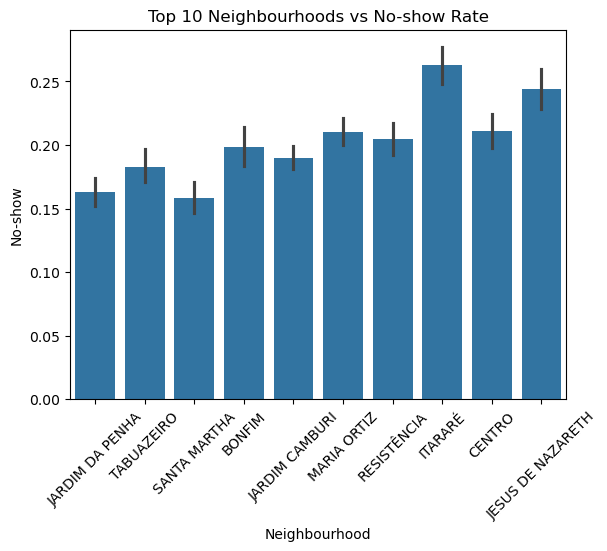

In [33]:
top10 = df['Neighbourhood'].value_counts().head(10).index
sns.barplot(data=df[df['Neighbourhood'].isin(top10)],
            x='Neighbourhood', y='No-show')
plt.xticks(rotation=45)
plt.title("Top 10 Neighbourhoods vs No-show Rate")
plt.show()